## Chapter 7 - Exercise 5: Trực quan hóa dữ liệu Loan

#### Cho tập dữ liệu loan_train.csv

Tập dữ liệu gồm có 346 khách hàng, KH đã trả hết các khoản vay hoặc còn đang trả. Giải thích các thuộc tính sau:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection (<b>khoản vay đã trả hết hoặc còn đang trả</b>)                                           |
| Principal      | Basic principal loan amount at the (<b>Số tiền cho vay gốc</b>)|
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule (<b>lịch trình thanh toán hàng tháng</b>) |
| Effective_date | When the loan got originated and took effects (<b>Ngày thực_hiện khi khoản vay có nguồn gốc và có hiệu lực</b>)                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date (<b> Ngày đến hạn </b>)                |
| Age            | Age of applicant (<b>Tuổi của KH vay</b>)                                                                      |
| Education      | Education of applicant (<b>Trình độ học vấn</b>)                                                                |
| Gender         | The gender of applicant (<b>Giới tính</b>)                                                               |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv('data/loan_train.csv')
loan.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [3]:
loan.shape

(346, 8)

In [4]:
loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 14.9+ KB


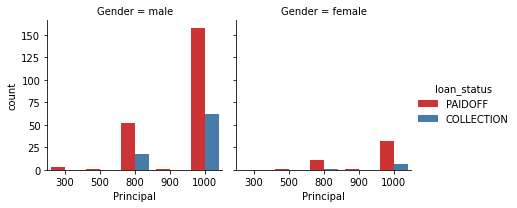

In [6]:
# Câu 1: Vẽ biểu đồ biểu diễn tần suất của Principal theo hai nhóm: Gender và loan_status
# cho nhận xét
sns.catplot(data=loan, kind='count', x='Principal', col='Gender',
hue='loan_status', palette='Set1', height=3.0)
plt.show()

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="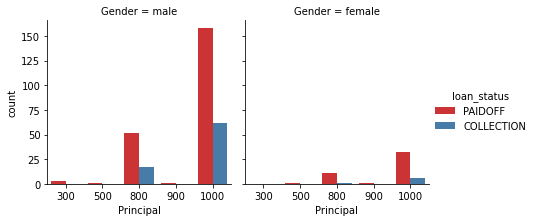
">
</details>

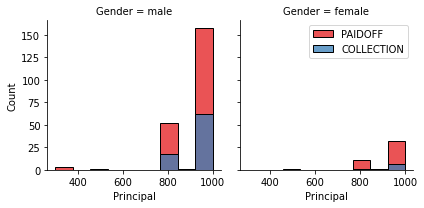

In [7]:
# Câu 2: Vẽ biểu đồ biểu diễn phân phối của Principal theo hai nhóm: Gender và loan_status
# cho nhận xét
bins = np.linspace(loan.Principal.min(), loan.Principal.max(), 10)
g = sns.FacetGrid(loan, col='Gender', hue='loan_status', palette='Set1')
g.map(sns.histplot, 'Principal', bins=bins)
plt.legend()
plt.show()

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="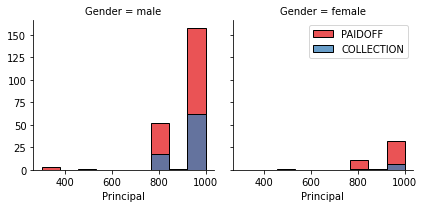
">
</details>

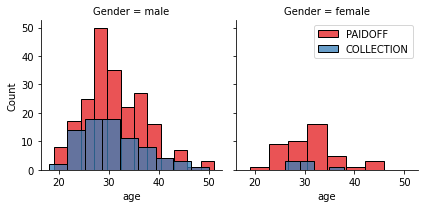

In [8]:
# Câu 3: Vẽ biểu đồ biểu diễn phân phối của age theo hai nhóm: Gender và loan_status
# cho nhận xét
g = sns.FacetGrid(loan, col='Gender', hue='loan_status', palette='Set1')
g.map(sns.histplot, 'age')
plt.legend()
plt.show()

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="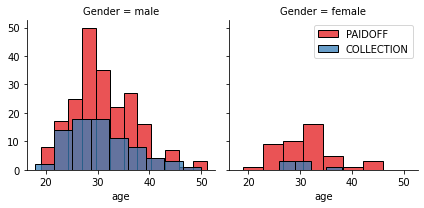
">
</details>

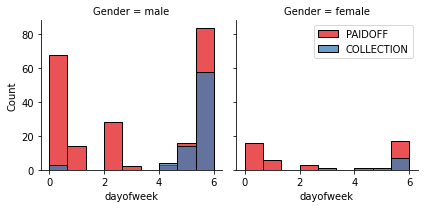

In [9]:
# Câu 4: Vẽ biểu đồ biểu diễn phân phối của dayofweek theo hai nhóm: Gender và loan_status

# tạo cột dayofweek (Monday=0, Sunday=6)
loan['dayofweek'] = pd.to_datetime(loan.effective_date).dt.dayofweek
# vẽ biểu đồ
bins = np.linspace(loan.dayofweek.min(), loan.dayofweek.max(), 10)
g = sns.FacetGrid(loan, col='Gender', hue='loan_status', palette='Set1')
g.map(sns.histplot, 'dayofweek', bins=bins, edgecolor='black')
plt.legend()
plt.show()

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<img src="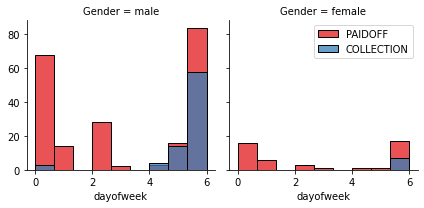
">
</details>